# COMP 755

Plan for today

1. Latent Linear Models
2. Factor Analysis
3. Principal Component Analysis

$$
\renewcommand{\vvec}[2]{\left[ \begin{array}{c} \mathbf{#1}\\ \mathbf{#2} \end{array}\right]}
\renewcommand{\mmat}[4]{\left[ \begin{array}{cc} \mathbf{#1}&\mathbf{#2}\\ \mathbf{#3}&\mathbf{#4} \end{array}\right]}
\renewcommand{\aaa}{\mathbf{a}}
\renewcommand{\AAA}{\mathbf{A}}
\renewcommand{\xyvec}{\left[ \begin{array}{c} \xx\\\yy \end{array} \right]}
\renewcommand{\xyvecc}{\left[ \begin{array}{c} x^1\\y^1 \end{array} \right]}
\renewcommand{\mm}{\mathbf{m}}
\renewcommand{\xx}{\mathbf{x}}
\renewcommand{\yy}{\mathbf{y}}
\renewcommand{\zz}{\mathbf{z}}
\renewcommand{\vv}{\mathbf{v}}
\renewcommand{\ww}{\mathbf{w}}
\renewcommand{\XX}{\mathbf{X}}
\renewcommand{\WW}{\mathbf{W}}
\renewcommand{\VV}{\mathbf{V}}
\renewcommand{\ZZ}{\mathbf{Z}}
\renewcommand{\CC}{\mathbf{C}}
\renewcommand{\bbeta}{\boldsymbol{\mathbf{\beta}}}
\renewcommand{\mmu}{\boldsymbol{\mathbf{\mu}}}
\renewcommand{\ssigma}{\boldsymbol{\mathbf{\sigma}}}
\renewcommand{\reals}{\mathbb{R}}
\renewcommand{\loglik}{\mathcal{LL}}
\renewcommand{\penloglik}{\mathcal{PLL}}
\renewcommand{\likelihood}{\mathcal{L}}
\renewcommand{\Data}{\textrm{Data}}
\renewcommand{\given}{ \big| }
\renewcommand{\MLE}{\textrm{MLE}}
\renewcommand{\EE}{\mathbb{E}}
\renewcommand{\KL}{\textrm{KL}}
\renewcommand{\Bound}{\mathcal{B}}
\renewcommand{\tth}{\textrm{th}}
\renewcommand{\Gaussian}[2]{\mathcal{N}\left(#1,#2\right)}
\renewcommand{\norm}[1]{\left\lVert#1\right\rVert}
\renewcommand{\ones}{\mathbf{1}}
\renewcommand{\diag}[1]{\textrm{diag}\left( #1 \right)}
\renewcommand{\sigmoid}[1]{\sigma\left(#1\right)}
\renewcommand{\myexp}[1]{\exp\left\{#1\right\}}
\renewcommand{\mylog}[1]{\log\left\{#1\right\}}
\renewcommand{\argmax}{\mathop{\textrm{argmax}}}
\renewcommand{\new}{\textrm{new}}
\renewcommand{\old}{\textrm{old}}
\renewcommand{\bb}{\mathbf{b}}
\renewcommand{\ba}{\mathbf{a}}
\renewcommand{\BB}{\mathbf{B}}
\renewcommand{\BA}{\mathbf{A}}
\renewcommand{\BC}{\mathbf{C}}
\renewcommand{\SSS}{\mathbf{S}}
\renewcommand{\tr}[1]{\textrm{tr}\left\{#1\right\}}
$$

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
def generate_data(N,d,K,proby,mus,As=None):    
    if As is None:
        As = numpy.zeros((d,d,K))
        for k in range(K):
            As[:,:,k] = numpy.eye(d)
    ys = numpy.zeros(N,dtype='int')
    xs = numpy.zeros((d,N))
    for i in range(N):
        # Sample class according to the prior p(y)
        # in this case it is uniform
        ys[i] = numpy.random.choice(K,1)[0]      
        # Sample feature values according to p(x|y)
        # In this case, x ~ N(mmu[y[i]],sigma2*I)
        # To accomplish this, draw z1,z2 ~ N(0,I)    
        z = numpy.random.randn(2,1)
        # transform by matrix A and shift by class mean
        A = As[:,:,ys[i]].squeeze()
        mu = mus[:,ys[i]]
        Az = numpy.dot(A,z) 
        x = Az + mu[:,numpy.newaxis]
        xs[:,i] = x[:,0]
    return xs,ys
    
def plot_samples(xs,ys,mus=None,Sigmas=None,colors=['r','g','b','k','c','m'],labels=None):
    N = xs.shape[1]
    if not ys is None:        
        K = numpy.max(ys)+1        
        for c in range(K):
        # indices of samples assigned to class c
            ind = [i for i in range(N) if ys[i]==c]
            if labels is None:
                label = "Samples in cluster " + str(c)
            else:
                label = labels[c]
            plt.plot(xs[0,ind],xs[1,ind],colors[c]+'.',label=label)   
            if not mus is None:
                plt.plot(mus[0,c],mus[1,c],'wx',markersize=9,markeredgewidth=5)
                plt.plot(mus[0,c],mus[1,c],colors[c]+'x',markersize=7,markeredgewidth=3)
            if not Sigmas is None:
                plot_covariance(mus[:,c],Sigmas[:,:,c],2.0,colors[c])
        plt.legend(loc=2, bbox_to_anchor=(1,1))
    else:
        plt.plot(xs[0,:],xs[1,:],'.')

def plot_covariance(mu,Sigma,std_devs,color):
    N = 50
    alphas = numpy.linspace(0,2*numpy.pi,N)
    x = numpy.cos(alphas)
    y = numpy.sin(alphas)
    xy = numpy.vstack((x,y))
    d,v = numpy.linalg.eig(Sigma)
    d = numpy.sqrt(d)
    
        
    xy = std_devs*numpy.dot(numpy.dot(v,numpy.diag(d)),xy) + mu[:,numpy.newaxis]
    plt.plot(xy[0,:],xy[1,:],'w-',linewidth=6)
    plt.plot(xy[0,:],xy[1,:],color+':',linewidth=3)
    label = 'Eigenvectors'
    for j in range(2):
        plt.plot([mu[0],mu[0]+2.0*d[j]*v[0,j]],[mu[1],mu[1]+2.0*d[j]*v[1,j]],'k-',linewidth=6)        
        
        plt.plot([mu[0],mu[0]+2.0*d[j]*v[0,j]],[mu[1],mu[1]+2.0*d[j]*v[1,j]],color+'-',linewidth=4,label=label)        
        label = None
        

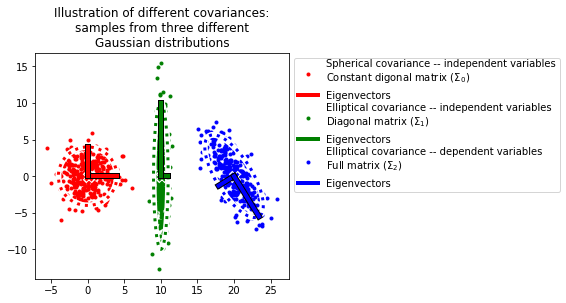

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
K = 3
d=2
mus = 10*numpy.asarray([[0.0,1.0,2.0],[0.0,0.0,0.0]])
As = numpy.asarray([[[2.0,0.0],[0.0,2.0]],
                    [[0.5,0.0],[0.0,5.0]],
                    [[2.0,-2.0],[0.0,2.0]]])
As = numpy.swapaxes(As,0,2)
Sigmas = numpy.zeros((d,d,K))
for c in range(K):
    A = As[:,:,c]
    Sigmas[:,:,c] = numpy.dot(A,A.transpose())

proby = [1./K]*K
numpy.random.seed(1)
xs,ys = generate_data(1000,2,K,proby,mus,As)

plot_samples(xs,ys,mus=mus,Sigmas=Sigmas,
             labels=['Spherical covariance -- independent variables\nConstant digonal matrix ($\Sigma_0$)',
                       'Elliptical covariance -- independent variables\nDiagonal matrix ($\Sigma_1$)',
                       'Elliptical covariance -- dependent variables\nFull matrix ($\Sigma_2$)'])
plt.axis('image')
plt.title('Illustration of different covariances:\nsamples from three different\nGaussian distributions');

# Difference between regression, mixure models, and subspace models

**Regression models** describe each sample using the same small number of weights, assuming predictors are given.

**Mixture models** describe each sample by its cluster membership and learned cluster parameters.

**Subspace models** describe a sample by the same learned basis, weighted by **different** small number of **coordinates** for each sample.


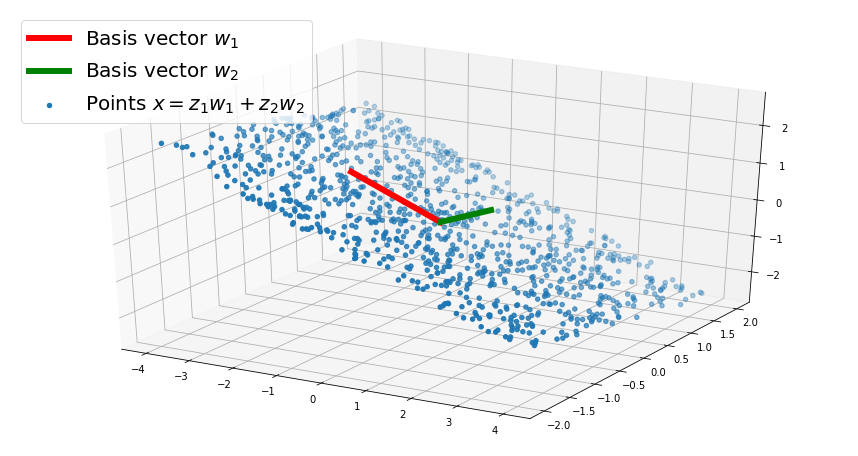

In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(3)


# basis vectors
v1 = np.asarray([-2.0,0.0,1.0])
v2 = np.asarray([0.0,1.0,-0.3])
# coordinates in subspace
z1 = 4.0*np.random.rand(1000,1) - 2.0
z2 = 4.0*np.random.rand(1000,1) - 2.0

xs =  z1*v1 + z2*v2
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs[:,0],xs[:,1],xs[:,2],label='Points $x = z_1 w_1 + z_2 w_2$')
ax.plot([0,v1[0]],[0,v1[1]],[0,v1[2]],color='r',linewidth=6,label='Basis vector $w_1$')
ax.plot([0,v2[0]],[0,v2[1]],[0,v2[2]],color='g',linewidth=6,label='Basis vector $w_2$')
ax.legend(loc=2,fontsize=20);

# Factor analysis model

Data is composed of samples $\xx_t$ of dimension $d$. 

We assume that there is a basis composed of $L$ vectors ($\WW=\left[\ww_1,...,\ww_L\right]$), 

Generative model for a point $\xx$

\begin{eqnarray*}
\zz &\sim& \mathcal{N}\left(0,I\right)\\
\xx &\sim& \mathcal{N}\left(\mmu + \WW\zz,\Psi\right)
\end{eqnarray*}

where $\WW,\mmu,\Psi$ are parameters.

Note that we assume that $\Psi$ is diagonal -- any dependencies in $\xx$ must be accounted for by the $\WW$ and $\zz$.



# Factor analysis
![](FA.png)

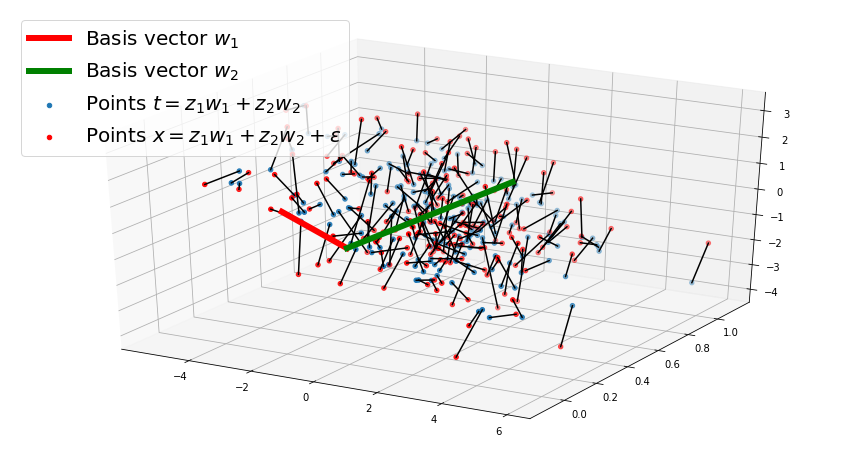

In [4]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(3)

T = 200
# basis vectors
v1 = np.asarray([-2.0,0.0,1.0])
v2 = np.asarray([0.0,1.0,-0.3])
# coordinates in subspace
z1 = np.random.randn(T,1) 
z2 = np.random.rand(T,1) 

ts =  z1*v1 + z2*v2
epsilon = np.random.randn(T,3)*np.asarray([0.1,0.1,1.0])
xs = ts + epsilon
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ts[:,0],ts[:,1],ts[:,2],label='Points $t = z_1 w_1 + z_2 w_2$')
ax.scatter(xs[:,0],xs[:,1],xs[:,2],label='Points $x = z_1 w_1 + z_2 w_2 + \epsilon$',c='red')
for (t,x) in zip(xs,ts):
    ax.plot([x[0],t[0]],[x[1],t[1]],[x[2],t[2]],color='k')
ax.plot([0,v1[0]],[0,v1[1]],[0,v1[2]],color='r',linewidth=6,label='Basis vector $w_1$')
ax.plot([0,v2[0]],[0,v2[1]],[0,v2[2]],color='g',linewidth=6,label='Basis vector $w_2$')
ax.legend(loc=2,fontsize=20);

# Multivariate Gaussian distribution

Next few slides will deal with multivariate Gaussian distributions.

Key observations:
1. if $p(x)$ and $p(y|x)$ are Gaussian then $p(y,x)$ is Gaussian
2. if $p(y,x)$ is Gaussian then $p(x)$ and $p(y|x)$ are Gaussian
3. if $p(x)$ is Gaussian and $p(y)$ is Gaussian then $p(y+x)$ is Gaussian


# Gaussian equalities 

Forming a joint from a marginal and a conditional 

\begin{eqnarray*}
\xx &\sim& \mathcal{N}(\aaa,\AAA)\\
\yy \mid\xx &\sim& \mathcal{N}(\bb+\CC\xx,\BB)\\
\xyvec &\sim& \mathcal{N}\left( \vvec{\aaa}{\bb + C\aaa},\mmat{\AAA}{\AAA^T\CC^T}{\CC\AAA}{\BB+\CC\AAA\CC^T} \right)
\end{eqnarray*}



# Gaussian equalities

\begin{eqnarray*}
\zz = \xyvec \sim \mathcal{N}\left(\vvec{a}{b},\mmat{A}{C}{C^T}{B}\right)
\end{eqnarray*}

Marginals

\begin{eqnarray*}
\xx &\sim& \mathcal{N}(\aaa,\AAA) \\
\yy &\sim& \mathcal{N}(\bb,\BB) 
\end{eqnarray*}

From a joint to conditionals

\begin{eqnarray*}
\xx|\yy &\sim& \mathcal{N}\left(\aaa + \CC\BB^{-1}(\yy - \bb), \AAA - \CC\BB^{-1}\CC^T\right)\\
\yy|\xx &\sim& \mathcal{N}\left(\bb + \CC^T\AAA^{-1}(\xx - \aaa), \BB - \CC^T\AAA^{-1}\CC\right)
\end{eqnarray*}



# Variance of conditional p(x|y) 
$$
\yy|\xx \sim \mathcal{N}\left(\bb + \CC^T\AAA^{-1}(\xx - \aaa), \BB - \CC^T\AAA^{-1}\CC\right)
$$
![](conditionals2.png)

# Sum of Gaussian random variables is a Gaussian random variable
Given two Gaussian distributed random variables $\xx$ and $\yy$

\begin{eqnarray*}
\xx &\sim& \mathcal{N}(\mmu_1,\Sigma_1) \\
\yy &\sim& \mathcal{N}(\mmu_2,\Sigma_2)
\end{eqnarray*}

their sum $\zz = \xx + \yy$  is also Gaussian distributed

\begin{eqnarray*}
\zz \sim \mathcal{N}(\mmu_1 + \mmu_2,\Sigma_1 + \Sigma_2)
\end{eqnarray*}

Note that variances and means are added together. Sum is more uncertain than each of the variables on their own.

# Inferring coordinates

One of the tasks we want to accomplish is to infer coordinates $\zz$ from data $\xx$ and parameters.

\begin{eqnarray*}
p(\zz\mid\xx,\mu,\Sigma) &=& \mathcal{N}(\zz \mid \mm,S)\\
S &=& (I + \WW^T\Psi^{-1}\WW)^{-1} \\
\mm &=& S(\WW^T\Psi^{-1}(\xx - \mu))
\end{eqnarray*}

Derivation of this distribution requires use of conditional Gaussian equalities and Sherman-Morrison-Woodbury/inversion lemma.


# EM algorithm for factor analysis:


\begin{eqnarray*}
\mmu = \frac{1}{T}\sum_t \xx_t
\end{eqnarray*}

E step:

\begin{eqnarray*}
\mm_t &=& \WW^T(\WW\WW^T + \Psi)^{-1}(\xx_t - \mmu)\\
\VV &=& I - \WW^T(\WW\WW^T + \Psi)^{-1}\WW 
\end{eqnarray*}

M step:

\begin{eqnarray*}
\WW^{\textrm{new}} &=& \left(\sum_t \xx_t\mm_t^T\right)\left(\sum_t \VV\right)^{-1} \\
\Psi^{\textrm{new}} &=& \frac{1}{T}\diag{\sum_t \xx_t\xx_t^T + \WW^{\textrm{new}}\sum_t \mm_t\xx_t^T }
\end{eqnarray*}

# Factor Analysis is unindentifiable

Unindentifability refers to situation where parameters of a distribution cannot be uniquely determined.

\begin{eqnarray*}
\zz &\sim& \mathcal{N}\left(0,I\right)\\
\xx &\sim& \mathcal{N}\left(\mmu + \WW\zz,\Psi\right)
\end{eqnarray*}

where $R$ is a rotation matrix  ($RR^T = I$) achieve the same log-likelihood. 

To show this, let $R$ is a rotation matrix  ($RR^T = I$), and compte we marginal distribution of $\xx$:

\begin{eqnarray*}
p(\xx\mid\mmu,\Psi,\WW) &=& \mathcal{N}(\mmu + \WW 0 , \Psi + \WW I \WW^T) \\
&=& \mathcal{N}(\mmu, \Psi + \WW\WW^T)  \\
p(\xx\mid\mmu,\Psi,\WW R) &=& \mathcal{N}(\mmu + \WW 0 , \Psi + \WW R I R^T\WW^T) \\
&=& \mathcal{N}(\mmu, \Psi + \WW\WW^T) 
\end{eqnarray*}

Hence, the data can be represented using factor analysis, but interpretation of matrix $\WW$ can be problematic.

# Principal Component Analysis

If we use the same model as Factor Analysis but make additional assumptions:
1. Subspace basis vectors are orthogonal ($W^TW = I$)
2. Variance $\Psi = \sigma^2I$ with very small $\sigma^2$

we arrive at a variant of Principal Component Analysis.

# Principal Component Analysis

For full statement see Theorem 12.2.1 in your book. Here we digest it a little bit.

Let:
1. each sample $\xx_t$ be of dimension $d$
2. $\WW$ be a matrix of size $d \times L$ such that $\WW^T\WW = I$
3. and $\zz_t,t=1,...T$, vectors of length $L$.

Minimum of
$$
J(\WW,\ZZ) = \frac{1}{T} \sum_{t=1}^T \underbrace{\norm{\xx_t - \WW\zz_t}^2}_{\textrm{reconstruction error}}
$$ 
is achieved for
1. $\WW^*$ composed of top $L$ eigenvectors of covariance matrix $\hat{\Sigma} = \frac{1}{T} \sum_{i=1}^T\xx_t\xx_t^T$
2. $\zz^*_t = (\WW^*)^T\xx_t$


# Principal Component Analysis -- interpretation

Given $\Data = \{\xx_t : t=1,...T\}$, where samples $\xx_t$ are d-long vectors, if you want to learn how to compress these vectors into shorter $L$ long representations $\zz_t$ 
1. compute covariance of the dataset $\hat{\Sigma} = \frac{1}{T} \sum_{i=1}^T\xx_t\xx_t^T$
2. extract top eigenvectors $\WW^*$
3. project data to the space spanned by those eigenvectors  $\zz^*_t = (\WW^*)^T\xx_t$

Top eigenvectors of the covariance matrix are directions along which the data varies the most.

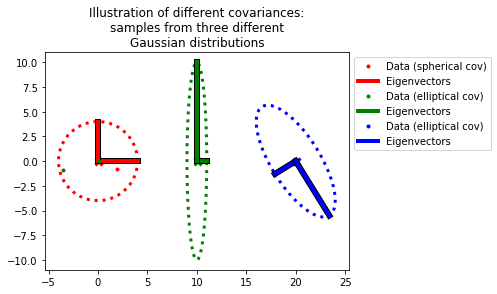

In [5]:
plot_samples(xs,ys,mus=mus,Sigmas=Sigmas,
             labels=['Data (spherical cov)',
                       'Data (elliptical cov)',
                       'Data (elliptical cov)'])
plt.axis('image')
plt.title('Illustration of different covariances:\nsamples from three different\nGaussian distributions');

# Applying PCA

1. Data is converted into a vector -- image of size $W\times H \times 3$ becomes a vector of $W*H*3$ values
2. Meaning of $j^{\tth}$ entry in a data vectors -- assume data is aligned
3. Eigenvector of covariance matrix is of same dimensionality as a data vector -- you can transform it back to the original shape
4. Make sure that you are computing the correct covariance
$$
\XX \XX^T \neq \XX^T \XX
$$
You could be looking at eigensample or eigenfeature.
5. You can visualize
  1. $\zz_t$ scores, one per sample
  2. $\ww_i$ eigenvectors or loadings
  3. $\WW\zz_t$ reconstructions, one per sample


# PCA on digit data
![](mnistpca.png)

# PCA on faces
![](eigenfaces.png)

# PCA on genetic data
Take genome of people in Europe. Compute PCA to obtain eigen-genomes. Project people on top two eigen-genomes.

![](europe.png)

# PCA

Principal component analysis is a commonly used tool; you should become familar with it.
Sometimes it is misunderstood

Jeff Porter, Cooking for Geeks:

![](eigenpancake.png)

# COMP 755
Today we covered:

1. Latent Linear Models
2. Factor Analysis
3. Principal Component Analysis
